# 降维、特征提取与流行学习

## 主成分分析(PCA)

In [1]:
import mglearn as mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

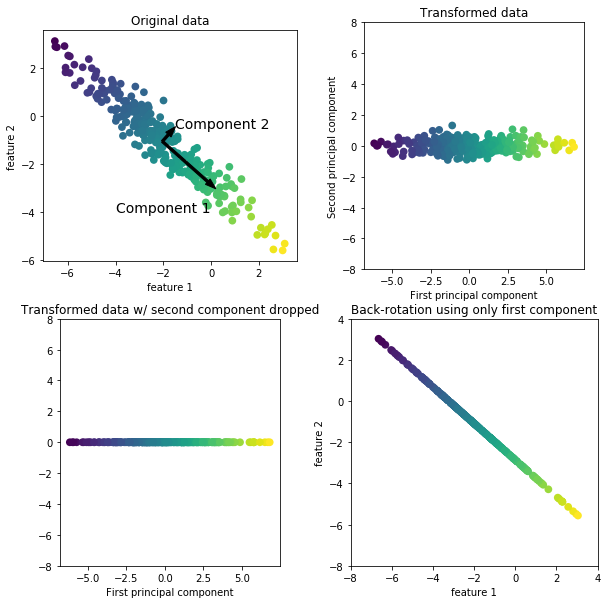

In [2]:
mglearn.plots.plot_pca_illustration()

### 1. 将PCA应用于cancer数据集并可视化

**乳腺癌数据。对每个特征分别计算两个类别(良性肿瘤和恶心肿瘤)的直方图**

In [3]:
from sklearn.datasets import load_breast_cancer

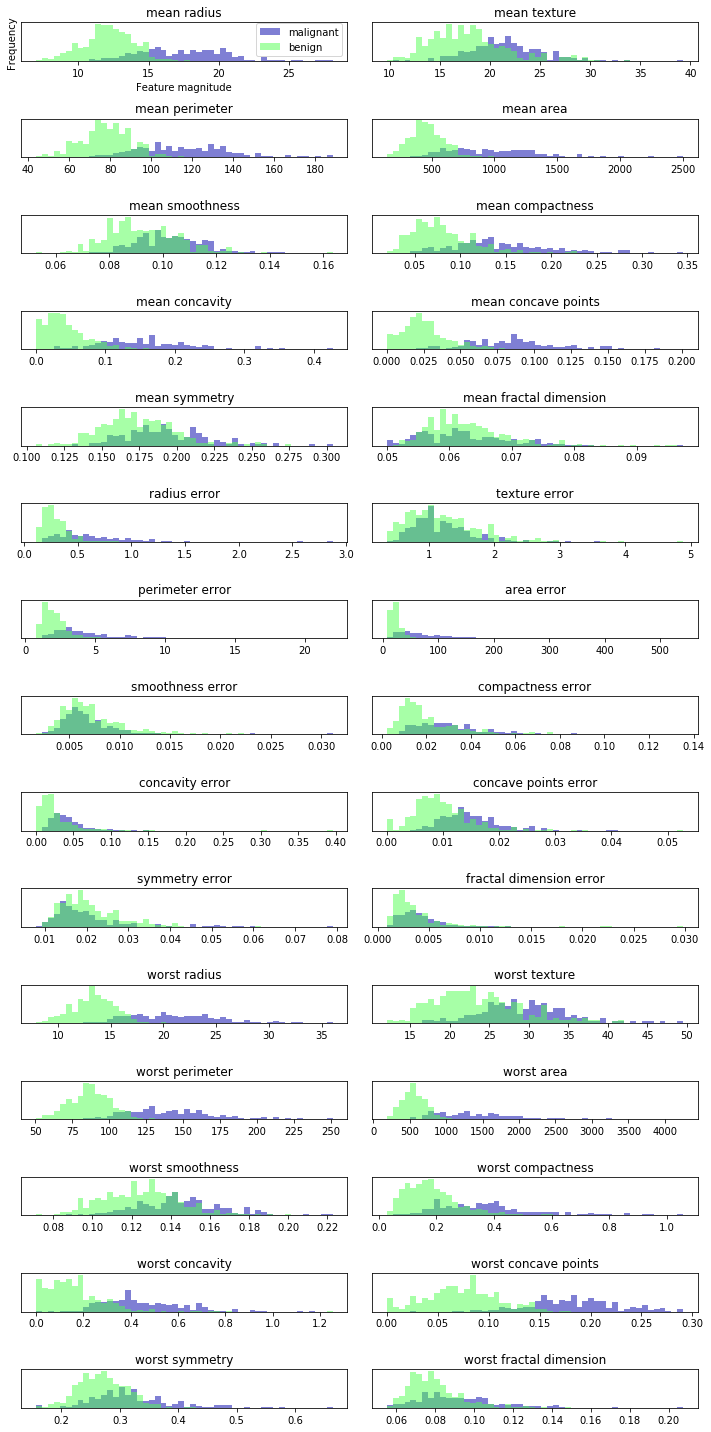

In [4]:
cancer = load_breast_cancer()

fig,axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()
# 这种图无法展示出特征与特征之间互相作用以及这个作用对标签的影响。


 **使用PCA**

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(cancer.data)
x_scaled = scaler.transform(cancer.data)

In [7]:
from sklearn.decomposition import PCA

In [8]:
#保留苏剧的前两个主成分
pca= PCA(n_components=2)
#对乳腺癌数据拟合PCA模型
pca.fit(x_scaled)

# 将数据变换到两个主成分的方向上
x_pca = pca.transform(x_scaled)
print("Original shape：{}",format(str(x_scaled.shape)))
print("Reduced shape：{}",format(str(x_pca.shape)))

# 对

Original shape：{} (569, 30)
Reduced shape：{} (569, 2)


In [9]:
cancer.data.shape

(569, 30)

Text(0,0.5,'Second principal component')

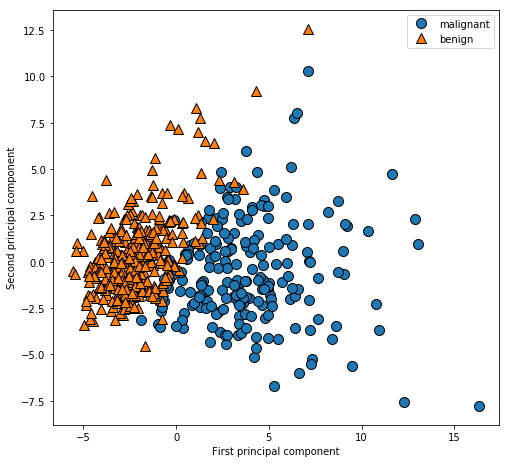

In [11]:
# 对第一个和第二个主成分作图
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.gca().set_aspect('equal')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [12]:
pca.components_ 
# components_每一行对应一个主成分，他们按照重要性有大到小排列。本例中为'mean radius' 'mean texture'

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

AttributeError: Unknown property rotaation

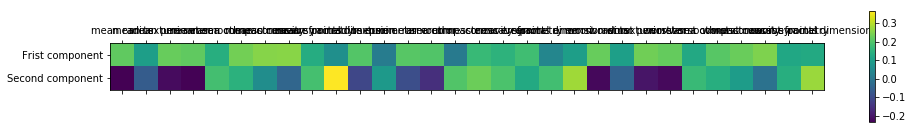

In [13]:
# 使用热土将系数可视化
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["Frist component","Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotaation=60,ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")